# <center>**Atividade Integradora**</center>

O projeto integrador de 2023 consiste em construir um pipeline completo de pré-processamento de dados e construção de modelo preditivo de classificação, voltado para predizer se uma empresa irá deixar de operar em até dois anos.
    
Os dados foram coletados e curados pela Bisnode, uma empresa europeia do ramo de business information.

São dados entre os anos de 2005 e 2016, com empresas em alguns segmentos da economia (como produtos eletrônicos, equipamentos elétricos, motores, etc.) e serviços (alimentação, bebidas e hospedagem). Empresas que possuem receita acima de 100 milhões de Euro foram remotivdas para fins de mininizar as possibilidades de identificação.

## Bibliotecas

In [13]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import missingno as msno
from random import choice
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Ajustando configurações de display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Pré-Processamento

Importando arquivo para um data frame com pandas.

In [14]:
df_bisnode = pd.read_csv("cs_bisnode_panel.csv")

df_bisnode

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,finished_prod,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,net_dom_sales,net_exp_sales,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,wages,D,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.00,2005-01-01,2005-12-31,NaN,692.59,7266.67,7574.07,0.00,0.00,0.00,NaN,1229.63,218.52,0.00,4355.56,2911.11,38222.22,NaN,NaN,22222.22,62.96,62751.85,881.48,1388.89,1229.63,NaN,NaN,0,364,0,2005,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN
1,1001034.00,2006-01-01,2006-12-31,NaN,603.70,13122.22,12211.11,0.00,0.00,0.00,NaN,725.93,996.30,0.00,7225.93,5896.30,38140.74,NaN,NaN,23844.45,755.56,64625.93,1637.04,1388.89,725.93,NaN,NaN,0,364,0,2006,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN
2,1001034.00,2007-01-01,2007-12-31,NaN,425.93,8196.30,7800.00,0.00,0.00,0.00,NaN,1322.22,570.37,0.00,7951.85,177.78,40174.07,NaN,NaN,22262.96,0.00,65100.00,1633.33,1388.89,1322.22,NaN,NaN,0,364,0,2007,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN
3,1001034.00,2008-01-01,2008-12-31,NaN,300.00,8485.19,7781.48,0.00,0.00,0.00,NaN,1022.22,714.81,0.00,5233.33,1392.59,54274.07,NaN,NaN,21107.41,0.00,78085.19,1725.93,1481.48,1022.22,NaN,NaN,0,365,0,2008,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,NaN
4,1001034.00,2009-01-01,2009-12-31,NaN,207.41,5137.04,15300.00,0.00,0.00,0.00,NaN,814.81,-11044.44,0.00,3259.26,11.11,41755.55,NaN,NaN,13237.04,-11074.07,45388.89,-9348.15,1481.48,814.81,NaN,NaN,0,364,0,2009,1990.00,NaN,2.00,0.00,0.50,1968.00,5686.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287824,464120938496.00,2011-01-01,2011-12-31,NaN,0.00,1807.41,3.70,0.00,0.00,0.00,NaN,0.00,25.93,0.00,0.00,1807.41,37.04,NaN,NaN,225.93,22.22,288.89,1803.70,1111.11,0.00,NaN,NaN,0,364,0,2011,1990.00,NaN,1.00,0.00,1.00,NaN,8187.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN
287825,464120938496.00,2012-01-01,2012-12-31,NaN,0.00,1518.52,96.30,0.00,0.00,0.00,NaN,0.00,-381.48,0.00,0.00,1518.52,96.30,NaN,NaN,285.19,-381.48,0.00,1422.22,1111.11,0.00,NaN,NaN,0,365,0,2012,1990.00,NaN,1.00,0.00,1.00,NaN,8187.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN
287826,464120938496.00,2013-01-01,2013-12-31,NaN,0.00,988.89,77.78,0.00,0.00,0.00,NaN,0.00,-511.11,0.00,0.00,966.67,207.41,NaN,NaN,296.30,-511.11,0.00,911.11,1111.11,0.00,NaN,NaN,0,364,0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN
287827,464120938496.00,2014-01-01,2014-12-31,NaN,0.00,644.44,233.33,0.00,0.00,0.00,NaN,0.00,-500.00,0.00,0.00,618.52,200.00,NaN,NaN,303.70,-500.00,0.00,411.11,1111.11,0.00,NaN,NaN,0,364,0,2014,1990.00,NaN,1.00,0.00,1.00,1942.00,1441.00,female,Domestic,5510.00,55.00,3.00,2,East,1990-08-22,NaN,NaN


Obtendo as principais informações

In [15]:
df_bisnode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287829 entries, 0 to 287828
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   comp_id               287829 non-null  float64
 1   begin                 287829 non-null  object 
 2   end                   287829 non-null  object 
 3   COGS                  18257 non-null   float64
 4   amort                 279789 non-null  float64
 5   curr_assets           287698 non-null  float64
 6   curr_liab             287698 non-null  float64
 7   extra_exp             269300 non-null  float64
 8   extra_inc             269300 non-null  float64
 9   extra_profit_loss     270626 non-null  float64
 10  finished_prod         17485 non-null   float64
 11  fixed_assets          287698 non-null  float64
 12  inc_bef_tax           280392 non-null  float64
 13  intang_assets         287689 non-null  float64
 14  inventories           287698 non-null  float64
 15  

### **Requisitos**

Requisitos descritos no pdf do projeto integrador.

- Remover as colunas: ['COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages', 'D'], pois elas apresentam um percentual considerável de missing data

In [16]:
# Criando função que retorna o percentual de missing data do dataframe

def missing_data_df(df):
    """
    Função que retorna o percentual de dados faltantes de um dataframe
    """
    # Contando o numero de linhas sem dado
    missing_count = df.isnull().sum()

    # Calculando o percentual com base no numero total de linhas do dataframe
    missing_percentage = (missing_count / len(df))*100

    missing_percentage = missing_percentage.sort_values(ascending=False)

    return missing_percentage


# Executando função para o dataframe
missing_data_df(df_bisnode).head(10)

D               100.00
finished_prod    93.93
wages            93.75
COGS             93.66
net_exp_sales    93.66
net_dom_sales    93.66
exit_year        86.50
exit_date        80.48
labor_avg        50.91
birth_year       38.85
dtype: float64

In [17]:
# Retirando colunas

df_bisnode = df_bisnode.drop(columns=['COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages', 'D'], axis=1)

# Visualizando alterações

missing_data_df(df_bisnode).head(10)

exit_year      86.50
exit_date      80.48
labor_avg      50.91
birth_year     38.85
founded_year   19.61
gender         19.60
origin         19.60
female         19.60
foreign        19.60
ceo_count      19.60
dtype: float64

Observando valores faltantes com a biblioteca missigno.

<Axes: >

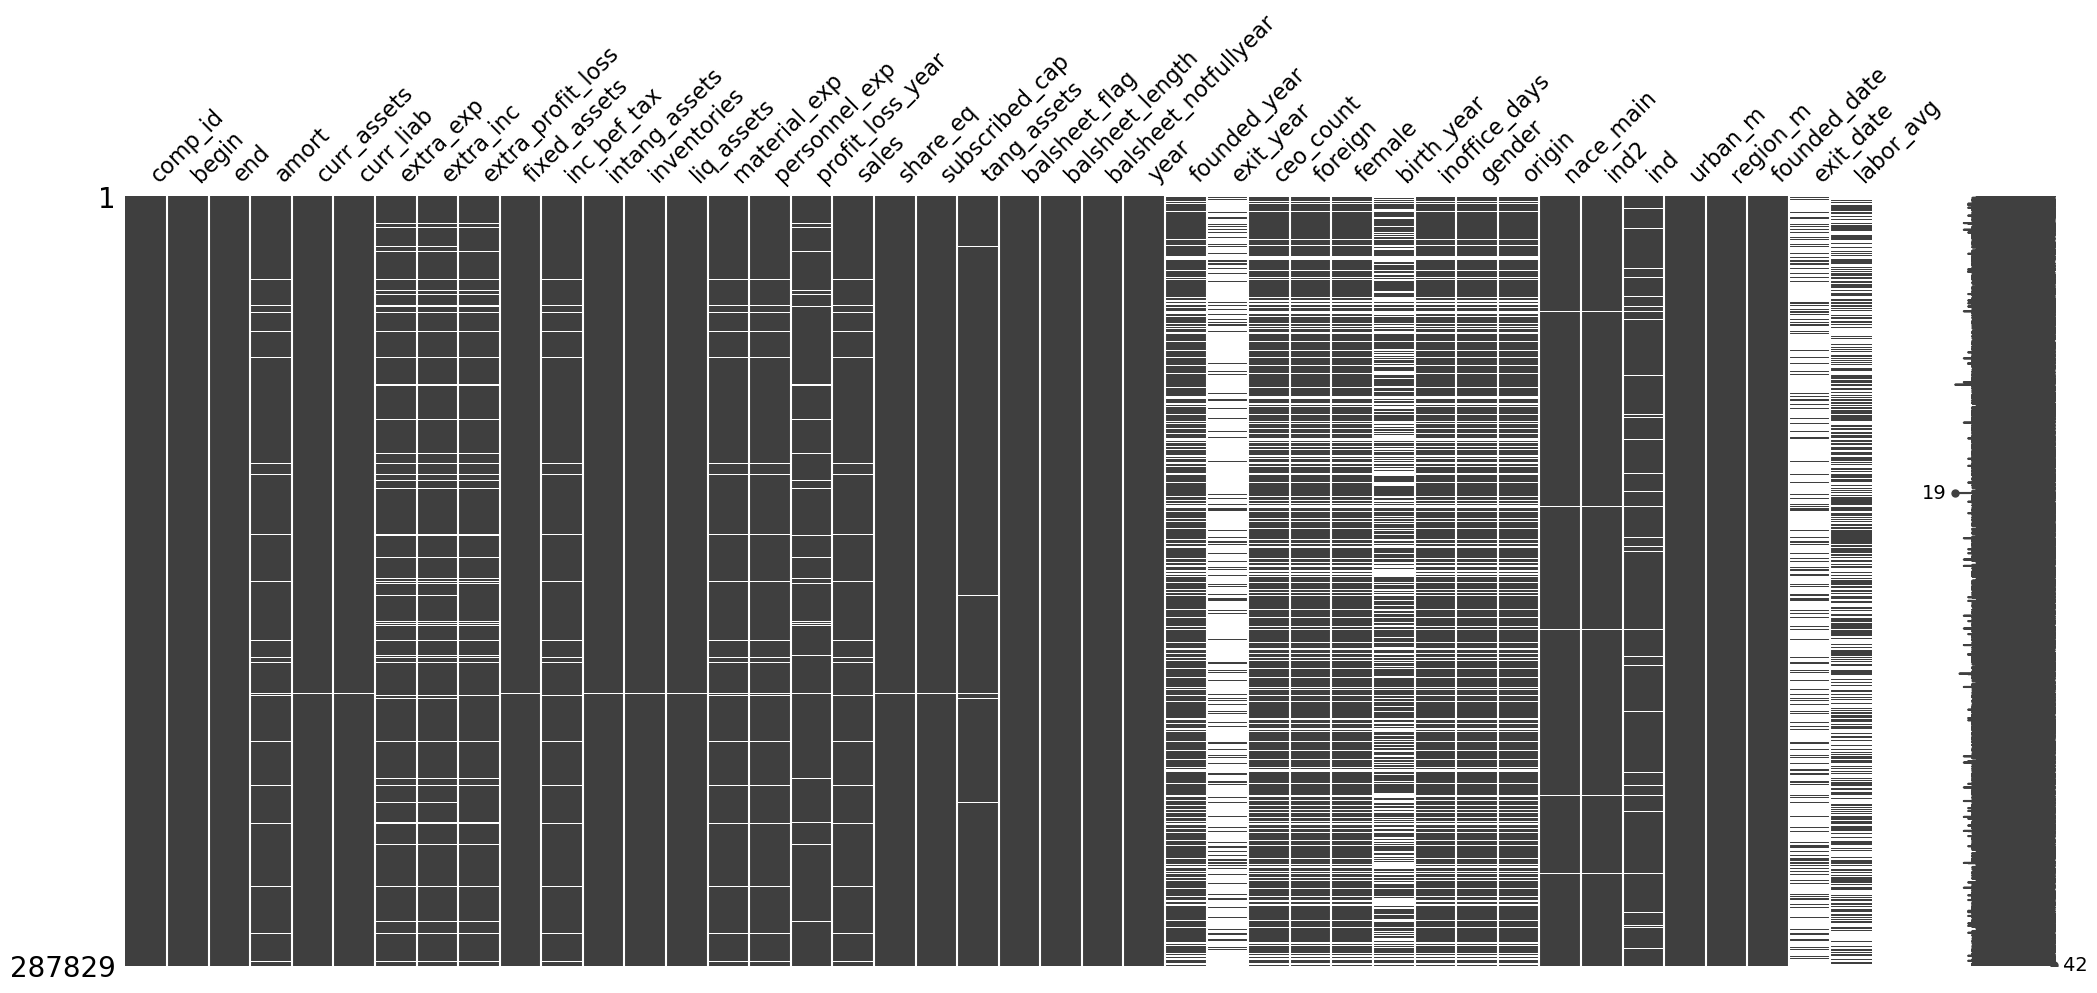

In [18]:
msno.matrix(df_bisnode)

Como pode ser observado, ainda existem colunas com um alto percentual de missing values.

- Remova de seus dados os registros do ano de 2016

In [19]:
# Removendo linhas com registro de 2016
df_bisnode = df_bisnode[df_bisnode['year'] != 2016]

- Será preciso criar uma coluna da variável dependente que será objeto da predição.
Para isso, use o conceito de que uma empresa deixou de operar se ela esteve ativa no
ano X, mas não apresentou vendas em X + 2 anos.

In [20]:
"""def preditora(row):
    lista_years = df_bisnode.loc[(df_bisnode['comp_id'] == row['comp_id']), "year"].to_list()

    if (row["year"]+2) in lista_years:
        return 0
    else:
        return 1


# Criando coluna de preditora aplicando a função criada
df_bisnode['preditora'] = df_bisnode.apply(preditora, axis=1)

df_bisnode"""

'def preditora(row):\n    lista_years = df_bisnode.loc[(df_bisnode[\'comp_id\'] == row[\'comp_id\']), "year"].to_list()\n\n    if (row["year"]+2) in lista_years:\n        return 0\n    else:\n        return 1\n\n\n# Criando coluna de preditora aplicando a função criada\ndf_bisnode[\'preditora\'] = df_bisnode.apply(preditora, axis=1)\n\ndf_bisnode'

In [21]:
#Verificaçao de Total Sales por Ano
visao_vendas = df_bisnode.groupby(['comp_id','year'])['sales'].sum().reset_index()

In [22]:
# Encontra o ultimo ano com venda positiva
empresas = list(df_bisnode['comp_id'].unique())

lista = list()

for empresa in empresas:
    filtro_empresa = (df_bisnode['comp_id']==empresa) & (df_bisnode['sales']>0)
    
    if filtro_empresa.any():
        maior_ano_positivo = df_bisnode[filtro_empresa]['year'].max()
        lista=lista + [[empresa,maior_ano_positivo]]
        
    else:
        lista = lista + [[empresa,'0']]

#Armazena lista criada em um Df
df_ano = pd.DataFrame(lista,columns=['empresa','ano_max'])

df_ano['ano_max'] = df_ano['ano_max'].astype(int)

In [23]:
#Merge com o Df 'chave'
merge_1 = visao_vendas.merge(df_ano,right_on='empresa',left_on='comp_id',how='left')

#x+2 anos=inativa (se o maior ano de vendas for =0 colocar 2 (empresa sempre inativa))
merge_1['preditora'] = np.where(merge_1['year']==merge_1['ano_max']+2,1,0)
merge_1['preditora'] = np.where(merge_1['ano_max']==0,2,merge_1['preditora'])

In [28]:
df_bisnode = df_bisnode.merge(merge_1[['comp_id','year','preditora']],right_on=['comp_id','year'],left_on=['comp_id','year'],how='left')

In [100]:
#Total de Inativadas por Ano
df_bisnode.groupby('year')['preditora'].sum()

year
2005    2218
2006    2102
2007    2412
2008    2583
2009    2700
2010    2831
2011    3315
2012    3397
2013    3572
2014    3671
2015    4345
Name: preditora, dtype: int64

AS CELULAS ABAIXOS SÓ DEVEM SER UTILIZADAS PARA NÃO PRECISAR RODAR A FUNÇÃO ACIMA.

In [29]:
#df_bisnode = pd.read_csv("bisnode_pos_predicao.csv", usecols=range(1, 44))

#df_bisnode

Conferindo aleatoriamente o resultado da função acima para três diferentes empresas escolhidas aleatóriamente.

In [41]:
comp_id_list = df_bisnode['comp_id'].to_list()


for _ in range(0,3):
    comp_id_sample = choice(comp_id_list)
    print(f"Para a empresa {comp_id_sample}")
    display(df_bisnode.loc[df_bisnode['comp_id'] == comp_id_sample, ['comp_id', 'year', 'preditora','sales']])
    print()

Para a empresa 280706809856.0


,comp_id,year,preditora,sales
216817,280706809856.00,2005,0,985.19
216818,280706809856.00,2006,0,16637.04
216819,280706809856.00,2007,0,21392.59
216820,280706809856.00,2008,0,35540.74



Para a empresa 193010614272.0


,comp_id,year,preditora,sales
179986,193010614272.00,2005,0,7325.93
179987,193010614272.00,2006,0,7259.26
179988,193010614272.00,2007,0,13696.30
179989,193010614272.00,2008,0,18907.41
179990,193010614272.00,2009,0,14055.56
179991,193010614272.00,2010,0,9637.04
179992,193010614272.00,2011,0,2688.89
179993,193010614272.00,2012,0,1514.81
179994,193010614272.00,2013,0,0.00
179995,193010614272.00,2014,1,0.00



Para a empresa 429327384576.0


,comp_id,year,preditora,sales
267651,429327384576.00,2011,0,NaN
267652,429327384576.00,2012,0,27596.30
267653,429327384576.00,2013,0,26403.70
267654,429327384576.00,2014,0,33651.85
267655,429327384576.00,2015,0,39344.45


- Filtre para trabalhar apenas com empresas do ano de 2012

In [42]:
# Criando novo dataframe com dados filtrados para o ano de 2012
df_bisnode_2012 = df_bisnode[df_bisnode['year'] == 2012]

df_bisnode_2012.head(10)

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora
7,1001034.00,2012-01-01,2012-12-31,140.74,148.15,21429.63,0.00,0.00,0.00,340.74,-2474.07,0.00,0.00,25.93,1862.96,285.19,-2474.07,0.00,-20940.74,1481.48,340.74,0,365,0,2012,1990.00,NaN,2.00,0.00,0.50,1954.00,4895.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,0.08,1
14,1001541.00,2012-01-01,2012-12-31,481.48,9629.63,1303.70,0.00,0.00,0.00,190566.67,-7696.30,0.00,0.00,9048.15,8351.85,0.00,-7722.22,1203.70,191262.97,200740.73,190566.67,0,365,0,2012,2008.00,NaN,1.00,0.00,0.00,1974.00,3222.00,male,Domestic,5610.00,56.00,3.00,3,Central,2008-02-24,NaN,NaN,0
23,1002029.00,2012-01-01,2012-12-31,14929.63,203885.19,120444.45,0.00,0.00,0.00,23459.26,11818.52,0.00,677.78,15077.78,984270.38,41037.04,9722.22,1136514.88,93144.45,11111.11,23459.26,0,365,0,2012,2006.00,NaN,2.00,0.00,0.00,1975.00,3101.00,male,Domestic,2711.00,27.00,2.00,3,East,2006-07-03,NaN,0.46,0
34,1003200.00,2012-01-01,2012-12-31,25.93,22.22,10996.30,0.00,0.00,0.00,0.00,-2337.04,0.00,0.00,22.22,1933.33,1355.56,-2340.74,2785.19,-23785.19,1851.85,0.00,0,365,0,2012,2003.00,2014.00,2.00,0.00,1.00,NaN,1754.00,female,Domestic,5630.00,56.00,3.00,1,Central,2003-10-21,2014-08-09,NaN,0
47,1007261.00,2012-01-01,2012-12-31,0.00,255.56,9207.41,0.00,0.00,0.00,0.00,-4670.37,0.00,0.00,255.56,0.00,4670.37,-4670.37,0.00,-8951.85,1851.85,0.00,0,365,0,2012,2010.00,2015.00,1.00,0.00,0.00,1962.00,1539.00,male,Domestic,5610.00,56.00,3.00,1,Central,2010-08-26,2015-11-19,0.08,0
55,1011889.00,2012-01-01,2012-12-31,36625.93,160166.67,18911.11,0.00,0.00,0.00,933574.06,96751.85,1537.04,11866.67,131766.67,204659.27,92614.81,96751.85,433666.66,1071011.12,17481.48,932037.06,0,365,0,2012,1992.00,NaN,1.00,0.00,0.00,1946.00,6198.00,male,Domestic,5510.00,55.00,3.00,2,West,1992-11-09,NaN,1.62,0
66,1014183.00,2012-01-01,2012-12-31,12551.85,199903.70,8274.07,0.00,7.41,7.41,118229.63,-1429.63,0.00,0.00,18585.19,66744.45,55711.11,-2351.85,129729.63,309885.19,11111.11,118229.63,0,365,0,2012,2001.00,NaN,1.00,0.00,0.00,1946.00,3594.00,male,Domestic,5510.00,55.00,3.00,2,Central,2001-12-21,NaN,0.72,0
77,1018301.00,2012-01-01,2012-12-31,0.00,1811.11,592.59,0.00,11.11,11.11,52155.55,-1096.30,118.52,496.30,1314.81,3325.93,3407.41,-1107.41,6722.22,10781.48,11111.11,52037.04,0,365,0,2012,2004.00,NaN,2.00,0.00,0.50,1961.50,1246.50,mix,Domestic,5630.00,56.00,3.00,2,Central,2004-06-29,NaN,0.15,0
88,1022796.00,2012-01-01,2012-12-31,688.89,6166.67,6792.59,0.00,0.00,0.00,5133.33,-1262.96,0.00,555.56,3133.33,17629.63,8070.37,-1311.11,26096.30,3718.52,3703.70,5133.33,0,365,0,2012,2001.00,2016.00,1.00,0.00,0.00,1969.00,5201.00,male,Domestic,5630.00,56.00,3.00,1,Central,2001-02-01,2016-06-06,0.08,0
99,1035705.00,2012-01-01,2012-12-31,251.85,3355.56,3059.26,0.00,0.00,0.00,0.00,-7992.59,0.00,2796.30,262.96,24588.89,7411.11,-8000.00,24025.93,296.30,11111.11,0.00,0,365,0,2012,2011.00,NaN,2.00,0.50,0.00,1973.00,1040.00,male,mix,5630.00,56.00,3.00,2,East,2011-10-26,NaN,0.10,0


- Agora é o momento de olhar por inconsistências nos dados. Por exemplo, veja a coluna Sales . Há volumes de venda negativos, isso não faz sentido!

Aproveite para usar np.where para ajustar isso. De modo que onde Sales < 0 você já pode substituir por 0

In [43]:
# Verificando valores negativos da coluna sales
df_bisnode_2012[df_bisnode_2012['sales'] < 0]

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora
81102,39040622592.00,2012-01-01,2012-12-31,0.00,7607.41,44.44,0.00,0.00,0.00,0.00,-3540.74,0.00,0.00,6025.93,677.78,1244.44,-3548.15,-1607.41,7562.96,11111.11,0.00,0,365,0,2012,2001.00,NaN,1.00,0.00,1.00,1969.00,2638.00,female,Domestic,3320.00,33.00,2.00,1,Central,2001-10-26,NaN,NaN,0
175052,182804217856.00,2012-01-01,2012-12-31,0.00,9225.93,22381.48,0.00,0.00,0.00,0.00,-5266.67,0.00,7114.81,51.85,-5266.67,0.00,-5266.67,-5266.67,-13155.56,1851.85,0.00,0,365,0,2012,2011.00,2016.00,1.00,0.00,1.00,NaN,1231.00,female,Domestic,5610.00,56.00,3.00,3,East,2011-02-20,2016-04-19,0.17,0
217205,281625395200.00,2012-01-01,2012-12-31,0.00,7322.22,84888.89,0.00,0.00,0.00,2288.89,-18344.45,0.00,6492.59,0.00,0.00,0.00,-18370.37,-18344.45,-76070.37,11111.11,2288.89,0,365,0,2012,2006.00,NaN,1.00,0.00,0.00,1971.00,3762.00,male,Domestic,5610.00,56.00,3.00,1,Central,2006-08-10,NaN,0.23,0
269035,433430626304.00,2012-01-01,2012-11-18,0.00,40637.04,0.00,0.00,0.00,0.00,0.00,-4222.22,0.00,0.00,0.00,37266.67,6040.74,-4222.22,-888.89,40637.04,40740.74,0.00,0,322,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2611.00,26.00,2.00,3,East,2003-12-07,2013-02-20,0.35,0


In [44]:
# Tratando valores negativos
df_bisnode_2012['sales'] = np.where(df_bisnode_2012['sales'] < 0, 0, df_bisnode_2012['sales'])

print("Número de valores negativos na coluna sales:")
df_bisnode_2012.loc[df_bisnode_2012['sales'] < 0].shape[0]

Número de valores negativos na coluna sales:


/tmp/ipykernel_6330/3206351240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bisnode_2012['sales'] = np.where(df_bisnode_2012['sales'] < 0, 0, df_bisnode_2012['sales'])


0

- Essa variável é bastante assimétrica, concorda? Será que vale criar novas colunas que representem o valor em log dessa coluna?

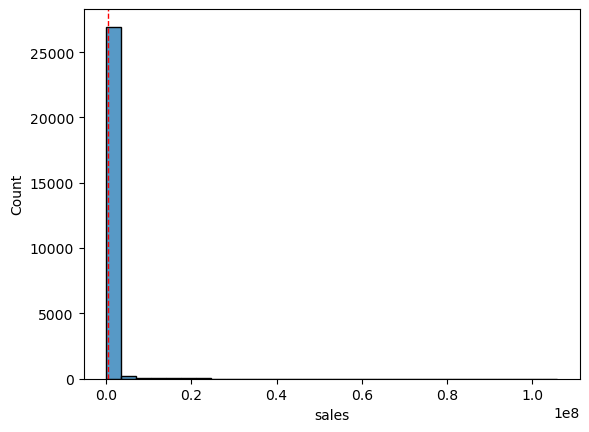

In [46]:
# Histograma da coluna sales

sns.histplot(df_bisnode_2012['sales'], bins=30)

plt.axvline(df_bisnode_2012["sales"].mean(), color='red', linestyle='dashed', linewidth=1)


plt.show()

In [47]:
# Estatistica descritiva para coluna sales
df_bisnode_2012['sales'].describe()

count       27446.00
mean       436431.60
std       3531812.97
min             0.00
25%          3248.15
50%         25155.56
75%         96763.89
max     105866208.00
Name: sales, dtype: float64

Nota-se que, claramente, existem valores atípicos que estão causando uma assimetria na distribuição. Após realizar analisar as estastiscas descritivas, fica evidente que a maior parte dos dados se encontra no intervalo entre 3.248 e 96.763,88. No entanto, o valor máximo está substancialmente acima desse range, puxando a média para a direita e elevando o desvio padrão.

Além destas caracteristicas, podemos tentar estimar a assimetria de uma distribuição em termos númericos utilizando uma função chamada kew(), que utiliza a seguinte formula:

$$S = \frac{n}{(n-1)(n-2)}\sum_{i=1}^{n}(\frac{x_{i}-\bar{x}}{S})^{3}$$

Distribuições normais se aproximam de zero, enquanto que valores positivos indicam uma distribuição mais esticada para a direita, equanto que uma negativa indica uma distribuição para esquerda. Valores muito alto, demonstro que a assimetria está alta.

In [48]:
# Cálculando a assimetria com a função skew() para coluna sales

df_bisnode_2012['sales'].skew()

17.695153326252793

Um valor positivo, como 17.97, indica uma assimetria positiva. Isso significa que a cauda da distribuição está esticada mais para a direita, não para a esquerda. Em termos práticos, isso pode significar que há um número muito grande de valores abaixo da média e alguns valores extremamente altos que estão puxando a média para cima.

Por conta disso, iremos utilizar a escala logaritimica para melhorar esta distribuição.

In [49]:
# Aplicando escala logaritimica na coluna sales

# Colunas com sales igual a zero
# OBS: Log de zero não existe e log de 1 é igual a zero
df_bisnode_2012.loc[df_bisnode_2012['sales'] == 0, 'sales'] = 1

# Aplicando log

df_bisnode_2012['sales'] = np.log(df_bisnode_2012['sales'])

df_bisnode_2012.head()

/tmp/ipykernel_6330/2687203189.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bisnode_2012['sales'] = np.log(df_bisnode_2012['sales'])


,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora
7,1001034.00,2012-01-01,2012-12-31,140.74,148.15,21429.63,0.00,0.00,0.00,340.74,-2474.07,0.00,0.00,25.93,1862.96,285.19,-2474.07,0.00,-20940.74,1481.48,340.74,0,365,0,2012,1990.00,NaN,2.00,0.00,0.50,1954.00,4895.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,0.08,1
14,1001541.00,2012-01-01,2012-12-31,481.48,9629.63,1303.70,0.00,0.00,0.00,190566.67,-7696.30,0.00,0.00,9048.15,8351.85,0.00,-7722.22,7.09,191262.97,200740.73,190566.67,0,365,0,2012,2008.00,NaN,1.00,0.00,0.00,1974.00,3222.00,male,Domestic,5610.00,56.00,3.00,3,Central,2008-02-24,NaN,NaN,0
23,1002029.00,2012-01-01,2012-12-31,14929.63,203885.19,120444.45,0.00,0.00,0.00,23459.26,11818.52,0.00,677.78,15077.78,984270.38,41037.04,9722.22,13.94,93144.45,11111.11,23459.26,0,365,0,2012,2006.00,NaN,2.00,0.00,0.00,1975.00,3101.00,male,Domestic,2711.00,27.00,2.00,3,East,2006-07-03,NaN,0.46,0
34,1003200.00,2012-01-01,2012-12-31,25.93,22.22,10996.30,0.00,0.00,0.00,0.00,-2337.04,0.00,0.00,22.22,1933.33,1355.56,-2340.74,7.93,-23785.19,1851.85,0.00,0,365,0,2012,2003.00,2014.00,2.00,0.00,1.00,NaN,1754.00,female,Domestic,5630.00,56.00,3.00,1,Central,2003-10-21,2014-08-09,NaN,0
47,1007261.00,2012-01-01,2012-12-31,0.00,255.56,9207.41,0.00,0.00,0.00,0.00,-4670.37,0.00,0.00,255.56,0.00,4670.37,-4670.37,0.00,-8951.85,1851.85,0.00,0,365,0,2012,2010.00,2015.00,1.00,0.00,0.00,1962.00,1539.00,male,Domestic,5610.00,56.00,3.00,1,Central,2010-08-26,2015-11-19,0.08,0


Conferindo se a distribuição se tornou normal.

In [50]:
# Cálculando o skew()

df_bisnode_2012['sales'].skew()

-1.0930092909117017

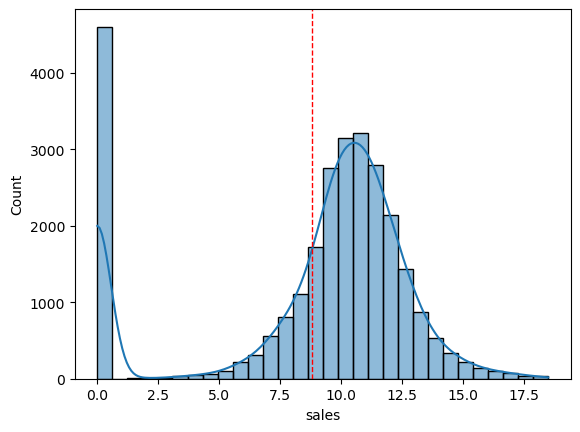

In [51]:
# Histograma da coluna sales

sns.histplot(df_bisnode_2012['sales'], bins=30, kde=True)
plt.axvline(df_bisnode_2012["sales"].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

Agora temos uma coluna de sales muito mais proxima de uma distribuição normal do que antes.Aparentemente,apenas os valores iguais a zero estão distorcendo a distribuição.

In [52]:
# Cálculando skew() para coluna sales sem os valores iguais a zero

df_bisnode_2012.loc[df_bisnode_2012['sales'] > 0, "sales"].skew()

-0.0073173576643085205

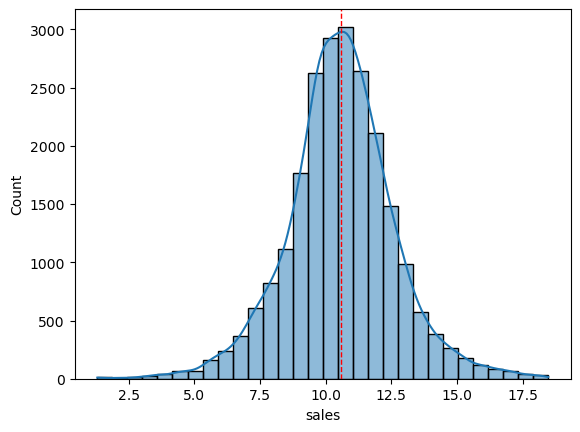

In [53]:
# Histograma da coluna sales sem os valores iguais a zero

sns.histplot(df_bisnode_2012.loc[df_bisnode_2012['sales'] > 0, "sales"], bins=30, kde=True)

plt.axvline(df_bisnode_2012.loc[df_bisnode_2012['sales'] > 0, "sales"].mean(), color='red', linestyle='dashed', linewidth=1)

plt.show()

Se não considerarmos os valores iguais a zero, a distribuição é muito proxima de uma distribuição normal.

Para não confundirmos as analises, iremos renomear a coluna sales como sales_log.

In [54]:
# Renomeando a coluna sales para sales_log

df_bisnode_2012.rename(columns={"sales": "sales_log"}, inplace=True)

df_bisnode_2012.head()

/tmp/ipykernel_6330/2351534428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bisnode_2012.rename(columns={"sales": "sales_log"}, inplace=True)


,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales_log,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora
7,1001034.00,2012-01-01,2012-12-31,140.74,148.15,21429.63,0.00,0.00,0.00,340.74,-2474.07,0.00,0.00,25.93,1862.96,285.19,-2474.07,0.00,-20940.74,1481.48,340.74,0,365,0,2012,1990.00,NaN,2.00,0.00,0.50,1954.00,4895.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,0.08,1
14,1001541.00,2012-01-01,2012-12-31,481.48,9629.63,1303.70,0.00,0.00,0.00,190566.67,-7696.30,0.00,0.00,9048.15,8351.85,0.00,-7722.22,7.09,191262.97,200740.73,190566.67,0,365,0,2012,2008.00,NaN,1.00,0.00,0.00,1974.00,3222.00,male,Domestic,5610.00,56.00,3.00,3,Central,2008-02-24,NaN,NaN,0
23,1002029.00,2012-01-01,2012-12-31,14929.63,203885.19,120444.45,0.00,0.00,0.00,23459.26,11818.52,0.00,677.78,15077.78,984270.38,41037.04,9722.22,13.94,93144.45,11111.11,23459.26,0,365,0,2012,2006.00,NaN,2.00,0.00,0.00,1975.00,3101.00,male,Domestic,2711.00,27.00,2.00,3,East,2006-07-03,NaN,0.46,0
34,1003200.00,2012-01-01,2012-12-31,25.93,22.22,10996.30,0.00,0.00,0.00,0.00,-2337.04,0.00,0.00,22.22,1933.33,1355.56,-2340.74,7.93,-23785.19,1851.85,0.00,0,365,0,2012,2003.00,2014.00,2.00,0.00,1.00,NaN,1754.00,female,Domestic,5630.00,56.00,3.00,1,Central,2003-10-21,2014-08-09,NaN,0
47,1007261.00,2012-01-01,2012-12-31,0.00,255.56,9207.41,0.00,0.00,0.00,0.00,-4670.37,0.00,0.00,255.56,0.00,4670.37,-4670.37,0.00,-8951.85,1851.85,0.00,0,365,0,2012,2010.00,2015.00,1.00,0.00,0.00,1962.00,1539.00,male,Domestic,5610.00,56.00,3.00,1,Central,2010-08-26,2015-11-19,0.08,0


- Será que isso também se aplica para as demais?

Primeiramente vamos separar as colunas númericas.

In [55]:
# Selecionando o nome das colunas númericas

colunas_numericas = df_bisnode_2012.select_dtypes(include=['number']).columns.to_list()

colunas_numericas

['comp_id',
 'amort',
 'curr_assets',
 'curr_liab',
 'extra_exp',
 'extra_inc',
 'extra_profit_loss',
 'fixed_assets',
 'inc_bef_tax',
 'intang_assets',
 'inventories',
 'liq_assets',
 'material_exp',
 'personnel_exp',
 'profit_loss_year',
 'sales_log',
 'share_eq',
 'subscribed_cap',
 'tang_assets',
 'balsheet_flag',
 'balsheet_length',
 'balsheet_notfullyear',
 'year',
 'founded_year',
 'exit_year',
 'ceo_count',
 'foreign',
 'female',
 'birth_year',
 'inoffice_days',
 'nace_main',
 'ind2',
 'ind',
 'urban_m',
 'labor_avg',
 'preditora']

Analisando se as colunas são categoricas.

In [56]:
# Obtendo as colunas númericas e não categoricas

ranking_colunas = sorted([(col, df_bisnode_2012[col].nunique()) for col in colunas_numericas], key=lambda x: x[1])

# Printando o resultado

for col, n in ranking_colunas:
    print(f'{col} : {n}')


year : 1
balsheet_flag : 2
balsheet_notfullyear : 2
ind : 3
urban_m : 3
preditora : 3
ceo_count : 8
exit_year : 9
female : 10
foreign : 11
founded_year : 31
ind2 : 65
birth_year : 218
nace_main : 273
balsheet_length : 344
extra_exp : 789
extra_inc : 1336
subscribed_cap : 1775
intang_assets : 1818
extra_profit_loss : 1867
labor_avg : 1893
amort : 5072
inventories : 6351
liq_assets : 7171
inoffice_days : 7551
profit_loss_year : 10631
tang_assets : 10807
fixed_assets : 11067
personnel_exp : 11105
inc_bef_tax : 11376
curr_assets : 12413
curr_liab : 13655
material_exp : 15883
sales_log : 17002
share_eq : 17740
comp_id : 28469


Como podemos ver pelo script acima, as colunas categoricas vão até a coluna balsheet_length, também sera necessario retirar a ultima coluna de comp_id.

In [57]:
# Realizando o primeiro corte
ranking_colunas = ranking_colunas[15:]

# Realizando o segundo corte
ranking_colunas = ranking_colunas[:-1]

ranking_colunas

[('extra_exp', 789),
 ('extra_inc', 1336),
 ('subscribed_cap', 1775),
 ('intang_assets', 1818),
 ('extra_profit_loss', 1867),
 ('labor_avg', 1893),
 ('amort', 5072),
 ('inventories', 6351),
 ('liq_assets', 7171),
 ('inoffice_days', 7551),
 ('profit_loss_year', 10631),
 ('tang_assets', 10807),
 ('fixed_assets', 11067),
 ('personnel_exp', 11105),
 ('inc_bef_tax', 11376),
 ('curr_assets', 12413),
 ('curr_liab', 13655),
 ('material_exp', 15883),
 ('sales_log', 17002),
 ('share_eq', 17740)]

A primeira analise de assimetria será utilizando a função skew().

In [58]:
# Ranking de skew()
ranking_skew = sorted([(col, df_bisnode_2012[col].skew()) for col, n in ranking_colunas], key=lambda x: x[1])

# Printando o resultado

for col, n in ranking_skew:
    print(f'{col} : {n}')

sales_log : -1.0930092909117017
inoffice_days : 1.0951473160270007
profit_loss_year : 7.802791761802183
labor_avg : 18.38516091814227
material_exp : 18.958043159215297
inventories : 25.746850720537342
curr_assets : 25.92736089996139
personnel_exp : 27.7265513273196
amort : 41.19364774691546
subscribed_cap : 74.19500579601413
curr_liab : 84.91490202937268
inc_bef_tax : 86.0391874914981
fixed_assets : 90.07168067670449
tang_assets : 96.72698133614497
extra_inc : 98.52658942520033
liq_assets : 101.36474333148189
extra_profit_loss : 114.82735574402324
share_eq : 118.2390127552435
extra_exp : 135.6316381073577
intang_assets : 164.4817517505811


A principio apenas as colunas sales_log e inoffice_days apresentam uma normalidade.

Para vizualizar esta assimetria, iremos plotar os histogramas.

In [59]:
# Criando lista de colunas para gráficos
grafico1 = [col for col, n in ranking_skew][:10]

grafico2 = [col for col, n in ranking_skew][10:]

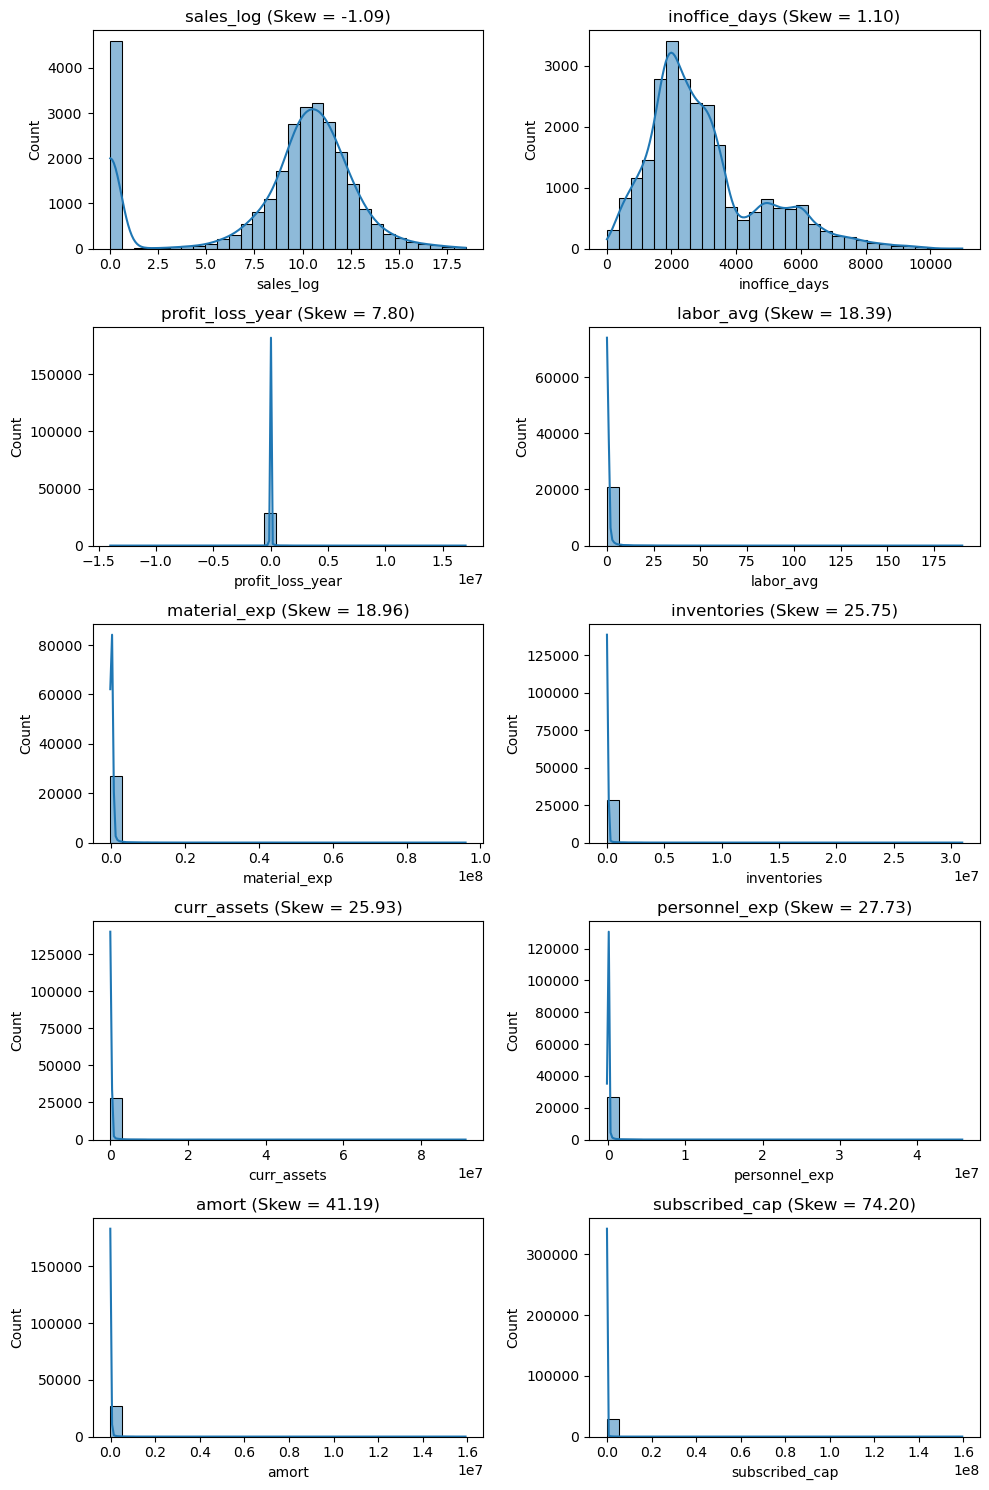

In [60]:
# Plotando primeira parte dos gráficos
# Criando figura 
fig, axes = plt.subplots(5, 2, figsize=(10, 15))

# Iterando para cada eixo
for i, ax in enumerate(axes.flat):
    if i < len(grafico1):  # Verificando para não exceder o índice
        col = grafico1[i]
        sns.histplot(df_bisnode_2012[col], bins=30, kde=True, ax=ax)
        
        # Calculando a assimetria
        skewness = df_bisnode_2012[col].skew()
        
        # Configurando o título com a assimetria
        ax.set_title(f"{col} (Skew = {skewness:.2f})")

plt.tight_layout()
plt.show()


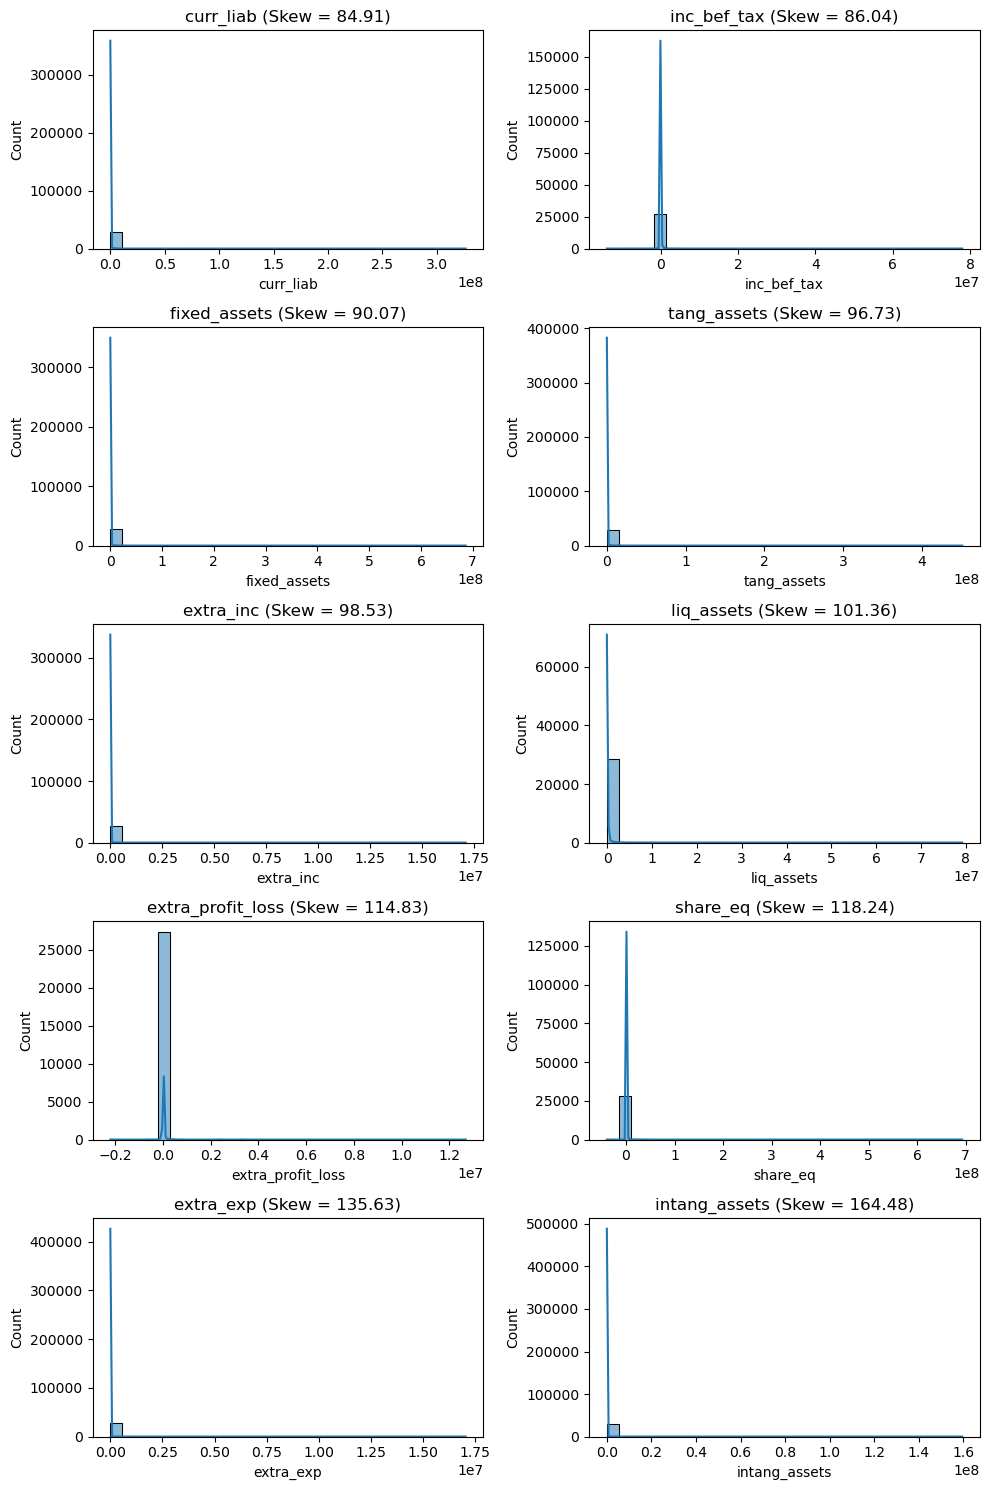

In [61]:
# Plotando segunda parte dos gráficos
# Criando figura 
fig, axes = plt.subplots(5, 2, figsize=(10, 15))

# Iterando para cada eixo
for i, ax in enumerate(axes.flat):
    if i < len(grafico2):  # Verificando para não exceder o índice
        col = grafico2[i]
        sns.histplot(df_bisnode_2012[col], bins=30, kde=True, ax=ax)
        
        # Calculando a assimetria
        skewness = df_bisnode_2012[col].skew()
        
        # Configurando o título com a assimetria
        ax.set_title(f"{col} (Skew = {skewness:.2f})")

plt.tight_layout()
plt.show()

Como já era esperado, apenas a coluna sales_log, que já havia sido tratada, e a coluna inoffice_days que não possuem problema de assimetria. As demais colunas serão utilizadas na escala logaritimica.

In [62]:
# Separando colunas para tratamento 

log_col_trat = [col for col,n in ranking_skew]

log_col_trat = log_col_trat[2:]

log_col_trat

['profit_loss_year',
 'labor_avg',
 'material_exp',
 'inventories',
 'curr_assets',
 'personnel_exp',
 'amort',
 'subscribed_cap',
 'curr_liab',
 'inc_bef_tax',
 'fixed_assets',
 'tang_assets',
 'extra_inc',
 'liq_assets',
 'extra_profit_loss',
 'share_eq',
 'extra_exp',
 'intang_assets']

In [63]:
# Realizando o tratamento em todas as colunas 

for col in log_col_trat:
    # Alterando colunas zeradas para receber log 
    df_bisnode_2012.loc[df_bisnode_2012[col] == 0, col] = 1

    # Realizando o tratamento
    df_bisnode_2012[col] = np.log(df_bisnode_2012[col])

    # Alterando o nome para log
    new_name = col + "_log"
    df_bisnode_2012.rename(columns={col: new_name}, inplace=True)


df_bisnode_2012.head()

/home/mariaukar/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_6330/3560406913.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bisnode_2012[col] = np.log(df_bisnode_2012[col])
/tmp/ipykernel_6330/3560406913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bisnode_2012.rename(columns={col: new_name}, inplace=True)
/tmp/ipykernel_6330/3560406913.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,comp_id,begin,end,amort_log,curr_assets_log,curr_liab_log,extra_exp_log,extra_inc_log,extra_profit_loss_log,fixed_assets_log,inc_bef_tax_log,intang_assets_log,inventories_log,liq_assets_log,material_exp_log,personnel_exp_log,profit_loss_year_log,sales_log,share_eq_log,subscribed_cap_log,tang_assets_log,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg_log,preditora
7,1001034.00,2012-01-01,2012-12-31,4.95,5.00,9.97,0.00,0.00,0.00,5.83,NaN,0.00,0.00,3.26,7.53,5.65,NaN,0.00,NaN,7.30,5.83,0,365,0,2012,1990.00,NaN,2.00,0.00,0.50,1954.00,4895.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,-2.48,1
14,1001541.00,2012-01-01,2012-12-31,6.18,9.17,7.17,0.00,0.00,0.00,12.16,NaN,0.00,0.00,9.11,9.03,0.00,NaN,7.09,12.16,12.21,12.16,0,365,0,2012,2008.00,NaN,1.00,0.00,0.00,1974.00,3222.00,male,Domestic,5610.00,56.00,3.00,3,Central,2008-02-24,NaN,NaN,0
23,1002029.00,2012-01-01,2012-12-31,9.61,12.23,11.70,0.00,0.00,0.00,10.06,9.38,0.00,6.52,9.62,13.80,10.62,9.18,13.94,11.44,9.32,10.06,0,365,0,2012,2006.00,NaN,2.00,0.00,0.00,1975.00,3101.00,male,Domestic,2711.00,27.00,2.00,3,East,2006-07-03,NaN,-0.78,0
34,1003200.00,2012-01-01,2012-12-31,3.26,3.10,9.31,0.00,0.00,0.00,0.00,NaN,0.00,0.00,3.10,7.57,7.21,NaN,7.93,NaN,7.52,0.00,0,365,0,2012,2003.00,2014.00,2.00,0.00,1.00,NaN,1754.00,female,Domestic,5630.00,56.00,3.00,1,Central,2003-10-21,2014-08-09,NaN,0
47,1007261.00,2012-01-01,2012-12-31,0.00,5.54,9.13,0.00,0.00,0.00,0.00,NaN,0.00,0.00,5.54,0.00,8.45,NaN,0.00,NaN,7.52,0.00,0,365,0,2012,2010.00,2015.00,1.00,0.00,0.00,1962.00,1539.00,male,Domestic,5610.00,56.00,3.00,1,Central,2010-08-26,2015-11-19,-2.48,0


Plotando os gráficos para conferir os resultados.

Devido à presença de muitos valores zerados nas colunas, optamos por desconsiderá-los ao plotar os histogramas, evitando assim uma visão distorcida.

In [64]:
# Criando lista com nomes corrigidos
log_col_trat = [col + "_log" for col in log_col_trat]

# separando gráficos

grafico1 = log_col_trat[:9]
grafico2 = log_col_trat[9:]

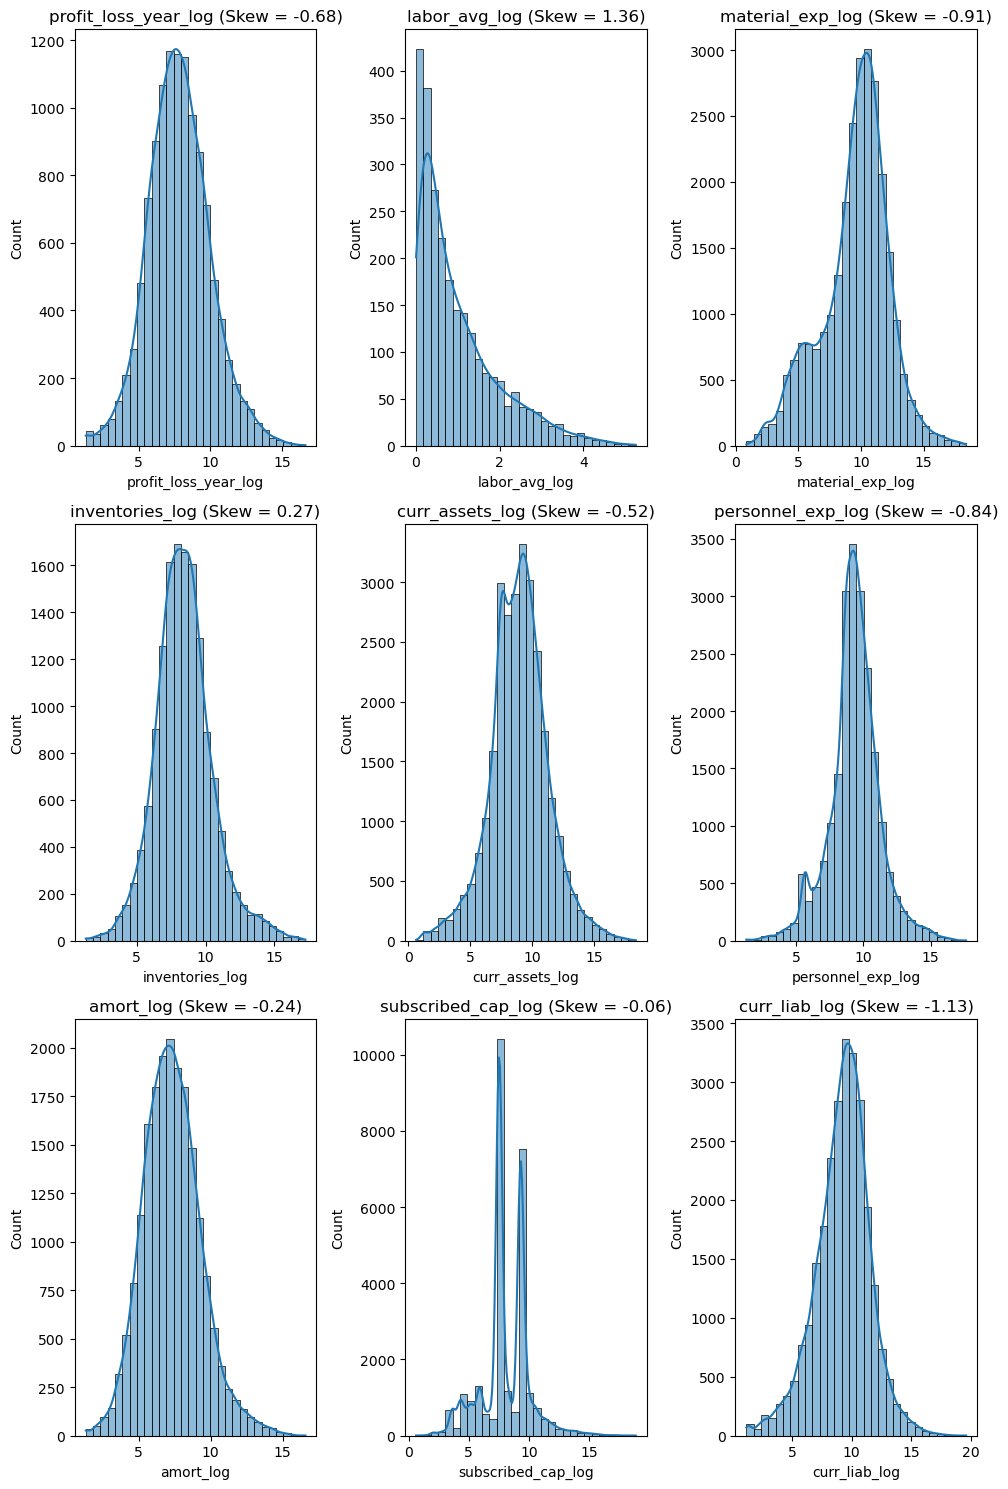

In [65]:
# Plotando primeira parte dos gráficos
# Criando figura 
fig, axes = plt.subplots(3, 3, figsize=(10, 15))

# Iterando para cada eixo
for i, ax in enumerate(axes.flat):
    if i < len(grafico1):  # Verificando para não exceder o índice
        col = grafico1[i]
        sns.histplot(df_bisnode_2012.loc[df_bisnode_2012[col] > 0, col], bins=30, kde=True, ax=ax)
        
        # Calculando a assimetria
        skewness = df_bisnode_2012[col].skew()
        
        # Configurando o título com a assimetria
        ax.set_title(f"{col} (Skew = {skewness:.2f})")

plt.tight_layout()
plt.show()

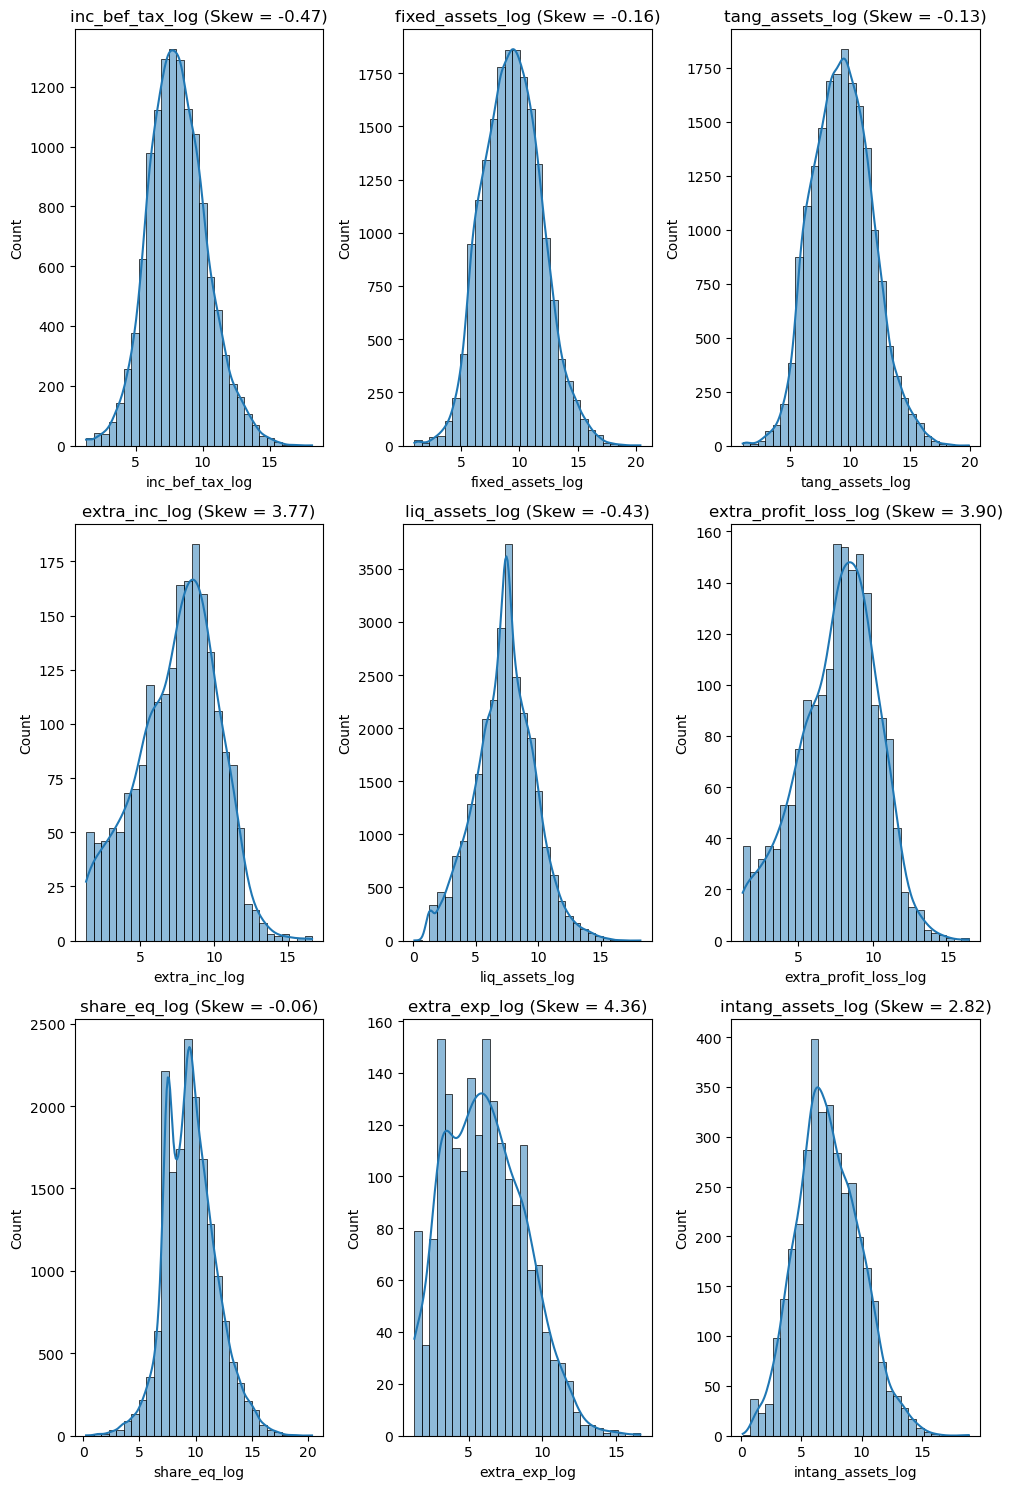

In [66]:
# Plotando segunda parte dos gráficos
# Criando figura 
fig, axes = plt.subplots(3, 3, figsize=(10, 15))

# Iterando para cada eixo
for i, ax in enumerate(axes.flat):
    if i < len(grafico2):  # Verificando para não exceder o índice
        col = grafico2[i]
        sns.histplot(df_bisnode_2012.loc[df_bisnode_2012[col] > 0, col], bins=30, kde=True, ax=ax)
        
        # Calculando a assimetria
        skewness = df_bisnode_2012[col].skew()
        
        # Configurando o título com a assimetria
        ax.set_title(f"{col} (Skew = {skewness:.2f})")

plt.tight_layout()
plt.show()

Após este tratamento, percebe-se que as distribuições ficaram bem mais proximas da normalidade.

- Crie novas colunas, como idade da empresa (faça isso pela subtração de
founded_year e year ). Ah, cuide bem dos missing values. np.where pode ajudar
bastante!

Primeiramente, analisando os valores missing.

In [67]:
# Pritando a porcentagem de valores com missing data 

missing_data_df(df_bisnode_2012[['year', 'founded_year', 'founded_date']])

founded_year   11.20
founded_date    0.01
year            0.00
dtype: float64

A coluna de founded year, possui mais do que 10% de linhas sem os dados

In [68]:
# Transformando as colunas de object para datetime

df_bisnode_2012["founded_date"] = pd.to_datetime(df_bisnode_2012["founded_date"])

df_bisnode_2012['founded_date'].dtype

/tmp/ipykernel_6330/321825081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bisnode_2012["founded_date"] = pd.to_datetime(df_bisnode_2012["founded_date"])


dtype('<M8[ns]')

A couna founded_year é gerada a parir da coluna founded date. Porém ela possui muitos valores nulos, diferente da coluna founded_date que está completa, por conta disto, iremos calcular as idades das empresas a partir desta coluna.

In [69]:
# Conferindo igualdade das colunas
sum(df_bisnode_2012['founded_date'].dt.year == df_bisnode_2012['founded_year'])

25280

In [70]:
# Dividindo as linhas que diferem pelo total de linhas

sum(df_bisnode_2012['founded_date'].dt.year != df_bisnode_2012['founded_year'])/df_bisnode_2012.shape[0]

0.11201657943728266

Nota-se que temos exatamente a porcentagem de valores missing ao dividir as linhas que diferem entre as duas colunas, indicando que elas são iguais, porém a coluba founded_year possui alguns valores missing.

In [71]:
# Cálculando a idade

df_bisnode_2012['comp_age'] = df_bisnode_2012['year'] - df_bisnode_2012['founded_date'].dt.year

df_bisnode_2012.head()

/tmp/ipykernel_6330/1390574370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bisnode_2012['comp_age'] = df_bisnode_2012['year'] - df_bisnode_2012['founded_date'].dt.year


,comp_id,begin,end,amort_log,curr_assets_log,curr_liab_log,extra_exp_log,extra_inc_log,extra_profit_loss_log,fixed_assets_log,inc_bef_tax_log,intang_assets_log,inventories_log,liq_assets_log,material_exp_log,personnel_exp_log,profit_loss_year_log,sales_log,share_eq_log,subscribed_cap_log,tang_assets_log,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg_log,preditora,comp_age
7,1001034.00,2012-01-01,2012-12-31,4.95,5.00,9.97,0.00,0.00,0.00,5.83,NaN,0.00,0.00,3.26,7.53,5.65,NaN,0.00,NaN,7.30,5.83,0,365,0,2012,1990.00,NaN,2.00,0.00,0.50,1954.00,4895.50,mix,Domestic,5630.00,56.00,3.00,1,Central,1990-11-19,NaN,-2.48,1,22.00
14,1001541.00,2012-01-01,2012-12-31,6.18,9.17,7.17,0.00,0.00,0.00,12.16,NaN,0.00,0.00,9.11,9.03,0.00,NaN,7.09,12.16,12.21,12.16,0,365,0,2012,2008.00,NaN,1.00,0.00,0.00,1974.00,3222.00,male,Domestic,5610.00,56.00,3.00,3,Central,2008-02-24,NaN,NaN,0,4.00
23,1002029.00,2012-01-01,2012-12-31,9.61,12.23,11.70,0.00,0.00,0.00,10.06,9.38,0.00,6.52,9.62,13.80,10.62,9.18,13.94,11.44,9.32,10.06,0,365,0,2012,2006.00,NaN,2.00,0.00,0.00,1975.00,3101.00,male,Domestic,2711.00,27.00,2.00,3,East,2006-07-03,NaN,-0.78,0,6.00
34,1003200.00,2012-01-01,2012-12-31,3.26,3.10,9.31,0.00,0.00,0.00,0.00,NaN,0.00,0.00,3.10,7.57,7.21,NaN,7.93,NaN,7.52,0.00,0,365,0,2012,2003.00,2014.00,2.00,0.00,1.00,NaN,1754.00,female,Domestic,5630.00,56.00,3.00,1,Central,2003-10-21,2014-08-09,NaN,0,9.00
47,1007261.00,2012-01-01,2012-12-31,0.00,5.54,9.13,0.00,0.00,0.00,0.00,NaN,0.00,0.00,5.54,0.00,8.45,NaN,0.00,NaN,7.52,0.00,0,365,0,2012,2010.00,2015.00,1.00,0.00,0.00,1962.00,1539.00,male,Domestic,5610.00,56.00,3.00,1,Central,2010-08-26,2015-11-19,-2.48,0,2.00


Analisando o resultado

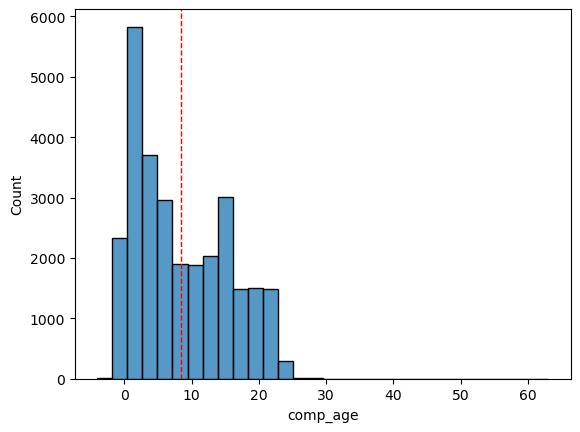

In [72]:
# Plotando histograma


sns.histplot(df_bisnode_2012['comp_age'], bins=30)

plt.axvline(df_bisnode_2012['comp_age'].mean(), color='red', linestyle='dashed', linewidth=1)


plt.show()

In [73]:
# Analisando valores negativos

df_bisnode_2012[df_bisnode_2012['comp_age'] < 0].head(10)

,comp_id,begin,end,amort_log,curr_assets_log,curr_liab_log,extra_exp_log,extra_inc_log,extra_profit_loss_log,fixed_assets_log,inc_bef_tax_log,intang_assets_log,inventories_log,liq_assets_log,material_exp_log,personnel_exp_log,profit_loss_year_log,sales_log,share_eq_log,subscribed_cap_log,tang_assets_log,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg_log,preditora,comp_age
1995,24919462.00,2012-01-01,2012-12-31,7.22,10.33,10.14,0.00,0.00,0.00,0.00,6.31,0.00,10.22,7.66,11.90,7.28,5.64,11.92,8.54,4.71,0.00,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5610.00,56.00,3.00,2,East,2013-06-28,NaN,NaN,0,-1.00
5042,149296720.00,2012-04-23,2012-12-31,NaN,7.52,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,7.52,NaN,NaN,0.00,NaN,7.52,7.52,0.00,1,252,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5610.00,56.00,3.00,3,Central,2013-04-19,NaN,NaN,2,-1.00
6701,276835232.00,2012-01-01,2012-12-31,8.45,10.19,11.50,3.26,0.00,NaN,9.55,8.80,0.00,8.38,9.75,11.72,10.75,8.80,12.01,NaN,5.40,9.55,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5610.00,56.00,3.00,2,Central,2013-10-14,NaN,NaN,0,-1.00
12207,894504384.00,2012-01-01,2012-12-31,9.17,12.79,10.31,0.00,0.00,0.00,12.54,11.31,6.31,9.16,10.75,12.28,11.06,11.21,12.92,12.14,9.32,12.53,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5510.00,55.00,3.00,3,West,2013-09-16,NaN,NaN,0,-1.00
12610,948919232.00,2012-01-01,2012-12-31,8.07,11.24,9.75,7.45,0.00,NaN,10.41,10.10,0.00,9.96,10.54,12.35,11.02,9.39,12.66,11.13,8.22,10.41,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2822.00,28.00,2.00,1,Central,2013-06-19,NaN,NaN,0,-1.00
29044,5070869504.00,2012-01-01,2012-12-31,9.85,13.22,12.95,2.92,0.00,NaN,11.63,10.24,0.00,10.99,11.96,13.49,12.81,10.20,13.88,12.13,10.70,11.63,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2829.00,28.00,2.00,2,Central,2013-11-05,NaN,NaN,0,-1.00
47106,13183213568.00,2012-01-01,2012-12-31,11.67,9.65,12.82,0.00,0.00,0.00,15.10,NaN,8.71,8.29,7.52,12.30,12.20,NaN,13.17,12.37,11.95,15.10,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5510.00,55.00,3.00,2,Central,2013-12-18,NaN,NaN,0,-1.00
61756,22589407232.00,2012-01-01,2012-12-31,8.51,10.89,10.04,0.00,0.00,0.00,12.31,NaN,0.00,9.04,8.85,9.60,8.37,NaN,9.06,12.44,7.99,10.55,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2651.00,26.00,2.00,1,Central,2013-06-30,NaN,NaN,0,-1.00
62218,22929582080.00,2012-01-01,2012-12-31,11.88,14.84,14.70,8.29,5.84,NaN,13.54,12.33,8.33,13.93,6.75,16.13,14.72,11.85,16.38,13.81,10.78,13.53,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,West,2016-02-29,NaN,NaN,0,-4.00
74190,32762394624.00,2012-01-01,2012-12-31,7.91,10.43,8.29,0.00,0.00,0.00,10.24,8.53,0.00,8.57,10.10,12.21,11.22,8.41,12.55,10.71,6.83,10.24,0,365,0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5630.00,56.00,3.00,3,East,2014-06-04,NaN,NaN,0,-2.00


In [74]:
# Analisando numero valores negativos

df_bisnode_2012[df_bisnode_2012['comp_age'] < 0].shape[0]

38

Existe algumas inconsistências nestes dados, já que essas empresas apresentam um balanço referente ao ano de 2012, porém têm o ano de criação registrado como posterior a 2012. Devido a essas incongruências e ao fato de serem poucas linhas afetadas(apenas 38), optaremos por excluí-las da análise.

In [75]:
# Retirando linhas com idade negativa da analise
df_bisnode_2012 = df_bisnode_2012[df_bisnode_2012['comp_age'] > 0]

print("Empresas com idade menor do que zero:")
df_bisnode_2012[df_bisnode_2012['comp_age']<0].shape[0]

Empresas com idade menor do que zero:


0

- Filtre seus dados para ter empresas que possuem receita (revenue) abaixo de 10
milhões de euros e acima de 1000 euros.

### **Tratamento do grupo**

Nesta parte do código está o tratamento e seleção de variaveis realizados pelo grupo. 

O output desta parte será o dataframe chamdo df_final, que será utilizado na modelagem de classificação.

In [76]:
# Criando dataframe final
df_final = df_bisnode_2012.copy()

#### Colunas "balsheet"

Entre as variáveis, existem três colunas que contêm informações que não serão incorporadas na modelagem:`balsheet_flag`, `balsheet_length` e `balsheet_notfullyear`.

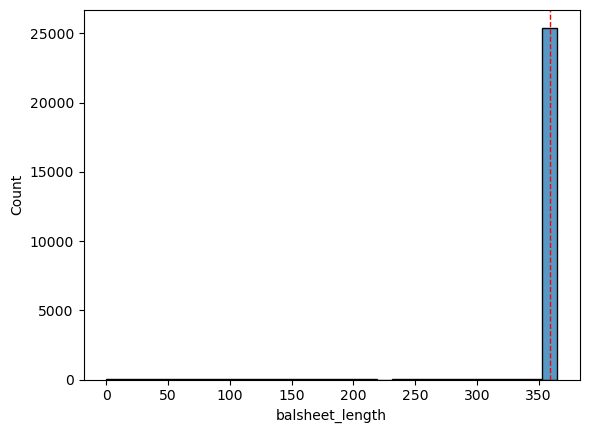

In [77]:
# Histograma balsheet_length

sns.histplot(df_bisnode_2012['balsheet_length'], bins=30)

plt.axvline(df_bisnode_2012["balsheet_length"].mean(), color='red', linestyle='dashed', linewidth=1)


plt.show()

Como podemos perceber, a grande maioria das observações possui o ano completo.

In [78]:
# Verificando balanços que não consideram o ano cheio

df_bisnode_2012[df_bisnode_2012['balsheet_length'] < 365].shape[0]/df_bisnode_2012.shape[0]

0.02951309141019752

Apenas 3% do data frame não possui anos completos, por conta disso iremos retirar estas linhas da analise.

In [79]:
# Retirando linhas e colunas do dataframe final

# Retirando linhas de balanços com o ano incompleto

df_final = df_final[df_final['balsheet_length'] >= 365]

# Retirando as três colunas

df_final = df_final.drop(columns=["balsheet_length", "balsheet_flag", "balsheet_notfullyear"])

#### Idade dos CEOs

Assim como optamos por trabalhar com a idade das empresas em vez das datas de fundação, na coluna `birth year` possuímos as idades dos CEOs. E para simplificar a modelagem, também vamos usar a idade dos CEOs, calculada pela subtração do ano atual, representado na coluna `year`, pelo ano de nascimento.

In [80]:
# Analisando a quantidade de valores missing

missing_data_df(df_final)['birth_year']

23.98927148660908

Como temos um número consideravel de valores missing, iremos tratar a coluna.

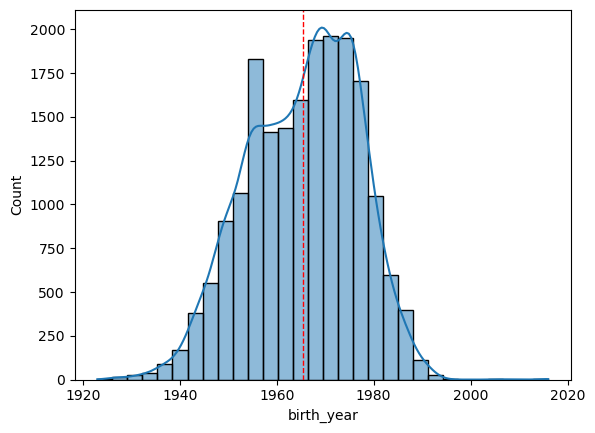

In [81]:
# Plotando histograma para observar

sns.histplot(df_final['birth_year'], bins=30, kde=True)

plt.axvline(df_final['birth_year'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.show()

Considerando que a coluna possui uma distribuição normal, iremos preencher as colunas com valores faltantes de maneira aleatoria considerando a média e desvio desta distribuição.

In [82]:
# Obtendo a média e desvio padrão
birth_year_mean = df_final["birth_year"].mean()
birth_year_std = df_final["birth_year"].std()

# Criando valores aleatorios para preencher valores faltantes
missing_count = sum(df_final['birth_year'].isna())
random_values = np.random.normal(birth_year_mean, birth_year_std, missing_count)
random_values = np.round(random_values).astype(int)

#Definindo semente aleatoria
random.seed(123) 
df_final.loc[df_final['birth_year'].isna(), "birth_year"] = random_values

# Conferindo o valor de missing
sum(df_final['birth_year'].isna())

0

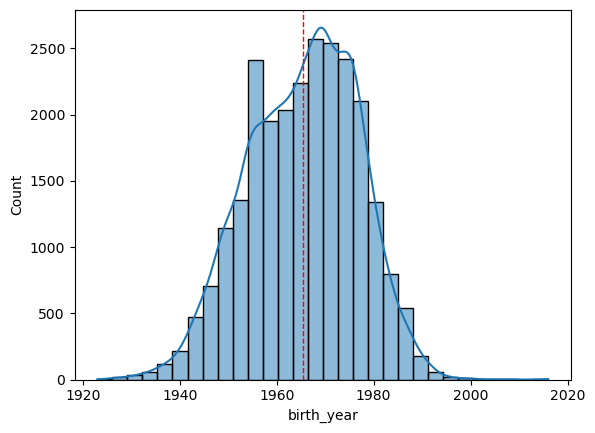

In [83]:
# Plotando a distribuição novamente
sns.histplot(df_final['birth_year'], bins=30, kde=True)

plt.axvline(df_final['birth_year'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.show()


Como pode ser observado a distribuição manteve o mesmo padrão de normalidade. Da mesma forma que o ano das empresas, esta coluna será desconsiderada, e a modelagem será realizada com base na idade dos CEOs.

In [84]:
# Criando dataframe com idade dos CEOs
df_final['CEO_age'] = df_final['year'] - df_final['birth_year']

Após o cálculo da idade, a coluna birth_year se torna dispensavel e sera retirada da analise.

In [85]:
# Retirando coluna de birth_year 
df_final = df_final.drop(columns=['birth_year'])

#### Colunas begin, end e year

Considerando que utilizaremos as idades ao inves das datas, as colunas `begin`, `end`,`year`, `founded_year` ,`exit_year`,`founded_date` e `exit_date` também podem ser retiradas da modelagem.

In [86]:
df_final = df_final.drop(columns=["begin", "end", "year","founded_year", "exit_year", "founded_date", "exit_date"])

#### Colunas categóricas correlacionadas

Analisando as colunas do código NACE, que demonstra o setor em que a empresa atua.

In [87]:
# Número de setores com 4 digitos
df_final['nace_main'].value_counts().shape[0]

261

In [88]:
# Número de setores com 2 digitos
df_final["ind2"].value_counts().shape[0]

64

In [89]:
# Número de setores geral
df_final['ind'].value_counts().shape[0]

3

In [90]:
# Analisando setores não classificados como ind
df_final.loc[~df_final['ind'].isin([3, 2, 1]), "ind2"].value_counts()

32.00    161
47.00     92
68.00     81
46.00     58
43.00     53
25.00     23
62.00     22
95.00     22
70.00     20
45.00     18
71.00     18
96.00     17
66.00     16
41.00     14
82.00     14
69.00     11
86.00     11
74.00     10
73.00     10
49.00      9
93.00      9
85.00      9
81.00      9
77.00      7
16.00      6
92.00      6
22.00      5
72.00      5
90.00      5
1.00       5
10.00      4
11.00      4
79.00      4
31.00      3
42.00      3
18.00      3
63.00      3
2.00       3
23.00      3
59.00      3
78.00      2
80.00      2
87.00      2
35.00      1
37.00      1
20.00      1
91.00      1
14.00      1
61.00      1
15.00      1
84.00      1
13.00      1
52.00      1
58.00      1
64.00      1
36.00      1
Name: ind2, dtype: int64

Tanto a coluna "nace_main" quanto a "ind2" apresentam problemas devido ao número limitado de observações. Muitas empresas são representadas por uma única observação, o que pode comprometer os resultados da nossa abordagem. Devido a isso, optamos por usar a coluna "ind", que tem uma classificação mais abrangente. No entanto, como essa coluna tem muitos valores zerados, essas entradas serão categorizadas como "4".

In [91]:
# Retirando as colunas nace_main e ind2

df_final = df_final.drop(columns=["nace_main", "ind2"])

In [92]:
# Criando a 4 categoria

df_final.loc[df_final['ind'].isna(), "ind"] = 4

df_final['ind'].value_counts()

3.00    17690
2.00     6284
4.00      799
1.00      580
Name: ind, dtype: int64

#### Colunas com alto valor de ausentes

In [93]:
missing_data_df(df_final)

inc_bef_tax_log         52.24
profit_loss_year_log    49.40
share_eq_log            38.76
labor_avg_log           21.39
extra_profit_loss_log    8.67
ceo_count                7.86
origin                   7.86
gender                   7.86
inoffice_days            7.86
female                   7.86
foreign                  7.86
material_exp_log         3.43
personnel_exp_log        3.41
amort_log                3.41
extra_exp_log            3.17
extra_inc_log            3.16
sales_log                3.15
region_m                 0.28
liq_assets_log           0.24
curr_assets_log          0.11
curr_liab_log            0.09
inventories_log          0.05
intang_assets_log        0.04
tang_assets_log          0.04
subscribed_cap_log       0.04
fixed_assets_log         0.03
comp_age                 0.00
preditora                0.00
comp_id                  0.00
urban_m                  0.00
ind                      0.00
CEO_age                  0.00
dtype: float64

In [94]:
# Retirando da base de dados

df_final = df_final.drop(columns=["inc_bef_tax_log", "profit_loss_year_log", "share_eq_log","labor_avg_log"])

#### Retirando linhas com valores nulos

In [95]:
# Retirando linhas com valores nulos

df_final = df_final.dropna()

In [96]:
df_final

,comp_id,amort_log,curr_assets_log,curr_liab_log,extra_exp_log,extra_inc_log,extra_profit_loss_log,fixed_assets_log,intang_assets_log,inventories_log,liq_assets_log,material_exp_log,personnel_exp_log,sales_log,subscribed_cap_log,tang_assets_log,ceo_count,foreign,female,inoffice_days,gender,origin,ind,urban_m,region_m,preditora,comp_age,CEO_age
7,1001034.00,4.95,5.00,9.97,0.00,0.00,0.00,5.83,0.00,0.00,3.26,7.53,5.65,0.00,7.30,5.83,2.00,0.00,0.50,4895.50,mix,Domestic,3.00,1,Central,1,22.00,58.00
14,1001541.00,6.18,9.17,7.17,0.00,0.00,0.00,12.16,0.00,0.00,9.11,9.03,0.00,7.09,12.21,12.16,1.00,0.00,0.00,3222.00,male,Domestic,3.00,3,Central,0,4.00,38.00
23,1002029.00,9.61,12.23,11.70,0.00,0.00,0.00,10.06,0.00,6.52,9.62,13.80,10.62,13.94,9.32,10.06,2.00,0.00,0.00,3101.00,male,Domestic,2.00,3,East,0,6.00,37.00
34,1003200.00,3.26,3.10,9.31,0.00,0.00,0.00,0.00,0.00,0.00,3.10,7.57,7.21,7.93,7.52,0.00,2.00,0.00,1.00,1754.00,female,Domestic,3.00,1,Central,0,9.00,40.00
47,1007261.00,0.00,5.54,9.13,0.00,0.00,0.00,0.00,0.00,0.00,5.54,0.00,8.45,0.00,7.52,0.00,1.00,0.00,0.00,1539.00,male,Domestic,3.00,1,Central,0,2.00,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278025,463885369344.00,6.30,9.57,9.50,0.00,0.00,0.00,8.99,0.00,0.00,9.53,11.89,9.18,11.96,7.52,8.99,1.00,0.00,0.00,2615.00,male,Domestic,4.00,3,East,0,3.00,34.00
278039,463981969408.00,9.70,10.35,9.02,0.00,0.00,0.00,11.64,0.00,0.00,8.74,12.00,10.97,12.16,9.32,11.64,1.00,0.00,0.00,7902.00,male,Domestic,2.00,1,Central,0,17.00,55.00
278049,464021159936.00,8.18,10.36,9.79,0.00,0.00,0.00,10.36,0.00,9.31,7.05,10.34,7.90,10.55,9.32,10.36,1.00,0.00,0.00,1221.00,male,Domestic,2.00,2,Central,0,6.00,37.00
278057,464044589056.00,11.24,15.38,14.08,0.00,0.00,0.00,12.56,0.00,13.59,11.89,15.61,14.06,15.96,11.44,12.56,1.00,1.00,0.00,2943.00,male,Foreign,2.00,3,Central,0,4.00,34.00


<Axes: >

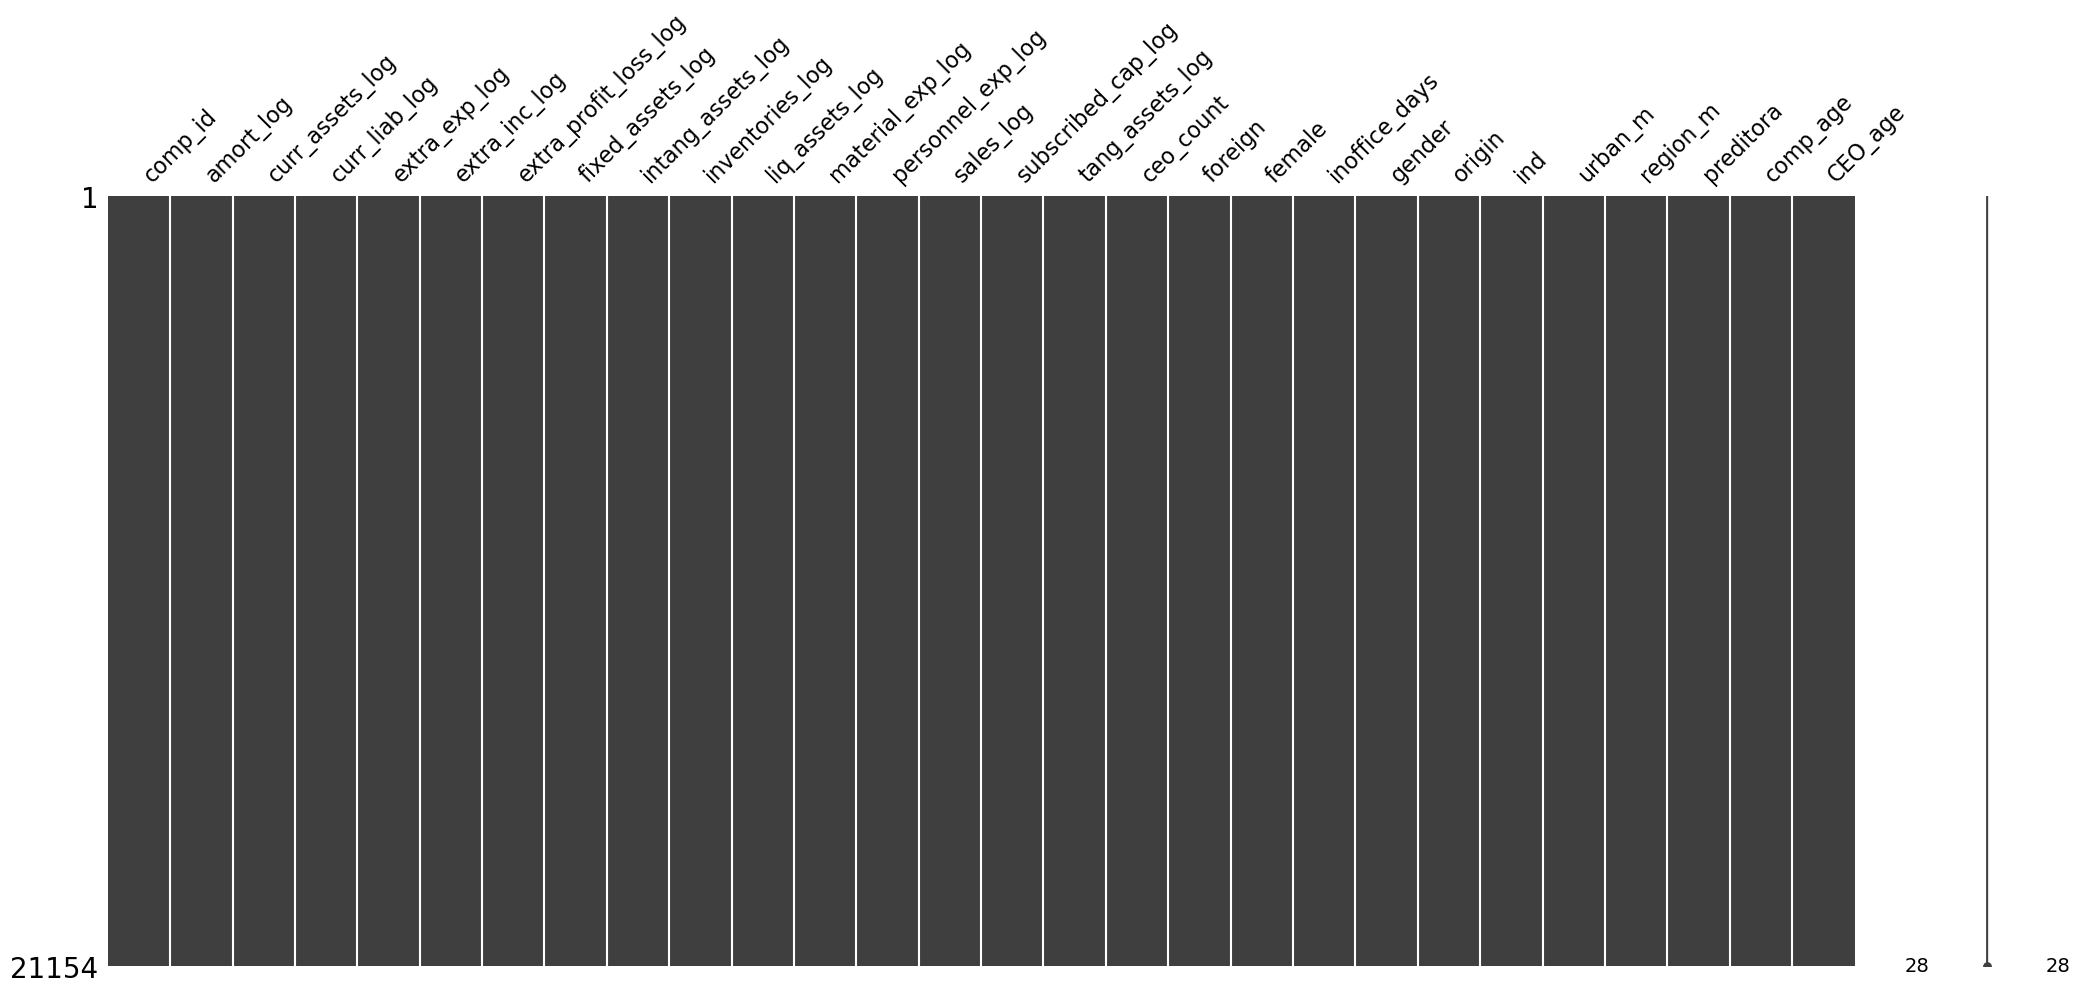

In [97]:
msno.matrix(df_final)

In [98]:
# Ajustando coluna de preditora para o final
cols = df_final.columns.to_list()

cols.remove("preditora")
cols.append("preditora")

df_final = df_final[cols]

df_final.head()


,comp_id,amort_log,curr_assets_log,curr_liab_log,extra_exp_log,extra_inc_log,extra_profit_loss_log,fixed_assets_log,intang_assets_log,inventories_log,liq_assets_log,material_exp_log,personnel_exp_log,sales_log,subscribed_cap_log,tang_assets_log,ceo_count,foreign,female,inoffice_days,gender,origin,ind,urban_m,region_m,comp_age,CEO_age,preditora
7,1001034.00,4.95,5.00,9.97,0.00,0.00,0.00,5.83,0.00,0.00,3.26,7.53,5.65,0.00,7.30,5.83,2.00,0.00,0.50,4895.50,mix,Domestic,3.00,1,Central,22.00,58.00,1
14,1001541.00,6.18,9.17,7.17,0.00,0.00,0.00,12.16,0.00,0.00,9.11,9.03,0.00,7.09,12.21,12.16,1.00,0.00,0.00,3222.00,male,Domestic,3.00,3,Central,4.00,38.00,0
23,1002029.00,9.61,12.23,11.70,0.00,0.00,0.00,10.06,0.00,6.52,9.62,13.80,10.62,13.94,9.32,10.06,2.00,0.00,0.00,3101.00,male,Domestic,2.00,3,East,6.00,37.00,0
34,1003200.00,3.26,3.10,9.31,0.00,0.00,0.00,0.00,0.00,0.00,3.10,7.57,7.21,7.93,7.52,0.00,2.00,0.00,1.00,1754.00,female,Domestic,3.00,1,Central,9.00,40.00,0
47,1007261.00,0.00,5.54,9.13,0.00,0.00,0.00,0.00,0.00,0.00,5.54,0.00,8.45,0.00,7.52,0.00,1.00,0.00,0.00,1539.00,male,Domestic,3.00,1,Central,2.00,50.00,0


In [99]:
# Salvando arquivo final em csv

df_final.to_csv("df_final.csv")